<a href="https://colab.research.google.com/github/jads-nl/discover-projects/blob/main/pima-indians-diabetes/r-example-ames-housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('psych')
install.packages('tidyverse')
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages('Metrics')
install.packages('e1071')
install.packages('glmnet')

library(psych)          # package to describe your data
library(tidyverse)      # easy way to subset your data
library(corrplot)       # to draw correlation plots
library(ggplot2)        # to plot graphs
library(caret)          # to run machine learning models
library(Metrics)        # to calculate RMSE
library(e1071)          # for statistical analyses
library(glmnet)         # for statistical analyses

options(scipen=999) # turn off scientific notation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’


── Attaching packages ───────────────────

In [ ]:

df = read.csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv')


The "Ames Housing" dataset contains information from the Ames Assessor's Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The dataset has 2,930 observations with 82 variables. For a complete description of all included variables, please look at: https://rdrr.io/cran/AmesHousing/man/ames_raw.html. 

## Exercise 1: Familiarize yourself with the data.
Provide a table with descriptive statistics for all included variables and check:

-Classes of each of the variables (e.g. factors or continuous variables).

-Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).  

-Explore missing values: sapply(df, function(x) sum(is.na(x)))  

HINT: Use the base-R function "str" (no package needed)
Use the "describe" function (from the psych"-package) for continuous variables and the "table" function (base-R) for factor variables.

In [ ]:
# To check the structure of the data, you can use the "str"-command:
str(df)

'data.frame':	2930 obs. of  82 variables:
 $ Order          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : int  526301100 526350040 526351010 526353030 527105010 527105030 527127150 527145080 527146030 527162130 ...
 $ MS.SubClass    : int  20 20 20 20 60 60 120 120 120 60 ...
 $ MS.Zoning      : chr  "RL" "RH" "RL" "RL" ...
 $ Lot.Frontage   : int  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot.Area       : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street         : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley          : chr  NA NA NA NA ...
 $ Lot.Shape      : chr  "IR1" "Reg" "IR1" "Reg" ...
 $ Land.Contour   : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities      : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ Lot.Config     : chr  "Corner" "Inside" "Corner" "Corner" ...
 $ Land.Slope     : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood   : chr  "NAmes" "NAmes" "NAmes" "NAmes" ...
 $ Condition.1    : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition.2    

All factor variables now have the 'character' class. The following code helps to convert each character variable into a factor variable:

In [ ]:
df[sapply(df, is.character)] <- lapply(df[sapply(df, is.character)], as.factor)
str(df)

'data.frame':	2930 obs. of  82 variables:
 $ Order          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : int  526301100 526350040 526351010 526353030 527105010 527105030 527127150 527145080 527146030 527162130 ...
 $ MS.SubClass    : int  20 20 20 20 60 60 120 120 120 60 ...
 $ MS.Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Lot.Frontage   : int  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot.Area       : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ Lot.Shape      : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land.Contour   : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities      : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lot.Config     : Factor w/ 5 levels "Corner","CulDSac",..: 1 5

In [ ]:
#Explore missing values: 
sapply(df, function(x) sum(is.na(x))) 

Order             PID     MS.SubClass       MS.Zoning    Lot.Frontage 
              0               0               0               0             490 
       Lot.Area          Street           Alley       Lot.Shape    Land.Contour 
              0               0            2732               0               0 
      Utilities      Lot.Config      Land.Slope    Neighborhood     Condition.1 
              0               0               0               0               0 
    Condition.2       Bldg.Type     House.Style    Overall.Qual    Overall.Cond 
              0               0               0               0               0 
     Year.Built  Year.Remod.Add      Roof.Style       Roof.Matl    Exterior.1st 
              0               0               0               0               0 
   Exterior.2nd    Mas.Vnr.Type    Mas.Vnr.Area      Exter.Qual      Exter.Cond 
              0               0              23               0               0 
     Foundation       Bsmt.Qual       Bsmt.Cond   Bsmt.Exposure  BsmtFin.Type.1 
              0              79              79              79              79 
   BsmtFin.SF.1  BsmtFin.Type.2    BsmtFin.SF.2     Bsmt.Unf.SF   Total.Bsmt.SF 
              1              79               1               1               1 
        Heating      Heating.QC     Central.Air      Electrical     X1st.Flr.SF 
              0               0               0               0               0 
    X2nd.Flr.SF Low.Qual.Fin.SF     Gr.Liv.Area  Bsmt.Full.Bath  Bsmt.Half.Bath 
              0               0               0               2               2 
      Full.Bath       Half.Bath   Bedroom.AbvGr   Kitchen.AbvGr    Kitchen.Qual 
              0               0               0               0               0 
  TotRms.AbvGrd      Functional      Fireplaces    Fireplace.Qu     Garage.Type 
              0               0               0            1422             157 
  Garage.Yr.Blt   Garage.Finish     Garage.Cars     Garage.Area     Garage.Qual 
            159             157               1               1             158 
    Garage.Cond     Paved.Drive    Wood.Deck.SF   Open.Porch.SF  Enclosed.Porch 
            158               0               0               0               0 
    X3Ssn.Porch    Screen.Porch       Pool.Area         Pool.QC           Fence 
              0               0               0            2917            2358 
   Misc.Feature        Misc.Val         Mo.Sold         Yr.Sold       Sale.Type 
           2824               0               0               0               0 
 Sale.Condition       SalePrice 
              0               0

In [ ]:
# To describe numeric and integer variables
df %>%
  keep(is.numeric) %>% 
  describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Order,1,2930,1465.50000000,845.9624696,1465.5,1465.5000000,1086.0045,1,2930,2929,0.00000000,-1.20122874,15.628499608
PID,2,2930,714464496.98873723,188730844.6493901,535453620.0,712423200.4014505,12373193.9730,526301100,1007100110,480799010,0.05582868,-1.99447715,3486655.776790518
MS.SubClass,3,2930,57.38737201,42.6380246,50.0,49.7632253,44.4780,20,190,170,1.35618974,1.37937166,0.787704389
Lot.Frontage,4,2440,69.22459016,23.3653350,68.0,68.3524590,17.7912,21,313,292,1.49722474,11.19773896,0.473017380
Lot.Area,5,2930,10147.92184300,7880.0177594,9436.5,9481.0499147,3024.5040,1300,215245,213945,12.80777396,264.38697056,145.577208077
Overall.Qual,6,2930,6.09488055,1.4110261,6.0,6.0755119,1.4826,1,10,9,0.19043881,0.04819422,0.026067611
Overall.Cond,7,2930,5.56313993,1.1115366,5.0,5.4680034,0.0000,1,9,8,0.57384146,1.48379654,0.020534775
Year.Built,8,2930,1971.35631399,30.2453606,1973.0,1974.2474403,37.0650,1872,2010,138,-0.60384346,-0.50461057,0.558759548
Year.Remod.Add,9,2930,1984.26655290,20.8602859,1993.0,1985.6284130,20.7564,1950,2010,60,-0.45140010,-1.34240688,0.385377580


In [ ]:
# To describe factor variables
temp = df %>%
  keep(is.factor)
for (i in 1:ncol(temp)) {
  print(names(temp[i]))
  print(table(temp[,i]))}


[1] "MS.Zoning"

A (agr) C (all)      FV I (all)      RH      RL      RM 
      2      25     139       2      27    2273     462 
[1] "Street"

Grvl Pave 
  12 2918 
[1] "Alley"

Grvl Pave 
 120   78 
[1] "Lot.Shape"

 IR1  IR2  IR3  Reg 
 979   76   16 1859 
[1] "Land.Contour"

 Bnk  HLS  Low  Lvl 
 117  120   60 2633 
[1] "Utilities"

AllPub NoSeWa NoSewr 
  2927      1      2 
[1] "Lot.Config"

 Corner CulDSac     FR2     FR3  Inside 
    511     180      85      14    2140 
[1] "Land.Slope"

 Gtl  Mod  Sev 
2789  125   16 
[1] "Neighborhood"

Blmngtn Blueste  BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  Greens 
     28      10      30     108      44     267     103     194     165       8 
GrnHill  IDOTRR Landmrk MeadowV Mitchel   NAmes NoRidge NPkVill NridgHt  NWAmes 
      2      93       1      37     114     443      71      23     166     131 
OldTown  Sawyer SawyerW Somerst StoneBr   SWISU  Timber Veenker 
    239     151     125     182      51      48      72  

## Exercise 2: 
There a several missing values in the dataset, which need to be tackled before we can proceed with the rest of the analysis. There are many ways to impute missing values, but for now, impute missing values for numeric variables with the median, and impute missings in all factor variables with the label "100".

In [ ]:
# Median imputation for continuous variables:
df<-data.frame(lapply(df,function(x) {
  if(is.numeric(x)) ifelse(is.na(x),median(x,na.rm=T),x) else x})) ### Impute median for all missing numeric values

In [ ]:
# "100" imputation for factor variables:

# generate a vector with variable names for all factor variables
factor_variables <- df %>%
  keep(is.factor) %>% names

# impute missing values for factor variables
df<-data.frame(lapply(df,function(x) {
  if(is.factor(x)) ifelse(is.na(x),"100",x) else x}))

# convert factor variables back to factor variables (imputation turned them into character variables)
df[factor_variables] <- lapply(df[factor_variables], factor)

In [ ]:
#Check missing values: 
sapply(df, function(x) sum(is.na(x)))

Order             PID     MS.SubClass       MS.Zoning    Lot.Frontage 
              0               0               0               0               0 
       Lot.Area          Street           Alley       Lot.Shape    Land.Contour 
              0               0               0               0               0 
      Utilities      Lot.Config      Land.Slope    Neighborhood     Condition.1 
              0               0               0               0               0 
    Condition.2       Bldg.Type     House.Style    Overall.Qual    Overall.Cond 
              0               0               0               0               0 
     Year.Built  Year.Remod.Add      Roof.Style       Roof.Matl    Exterior.1st 
              0               0               0               0               0 
   Exterior.2nd    Mas.Vnr.Type    Mas.Vnr.Area      Exter.Qual      Exter.Cond 
              0               0               0               0               0 
     Foundation       Bsmt.Qual       Bsmt.Cond   Bsmt.Exposure  BsmtFin.Type.1 
              0               0               0               0               0 
   BsmtFin.SF.1  BsmtFin.Type.2    BsmtFin.SF.2     Bsmt.Unf.SF   Total.Bsmt.SF 
              0               0               0               0               0 
        Heating      Heating.QC     Central.Air      Electrical     X1st.Flr.SF 
              0               0               0               0               0 
    X2nd.Flr.SF Low.Qual.Fin.SF     Gr.Liv.Area  Bsmt.Full.Bath  Bsmt.Half.Bath 
              0               0               0               0               0 
      Full.Bath       Half.Bath   Bedroom.AbvGr   Kitchen.AbvGr    Kitchen.Qual 
              0               0               0               0               0 
  TotRms.AbvGrd      Functional      Fireplaces    Fireplace.Qu     Garage.Type 
              0               0               0               0               0 
  Garage.Yr.Blt   Garage.Finish     Garage.Cars     Garage.Area     Garage.Qual 
              0               0               0               0               0 
    Garage.Cond     Paved.Drive    Wood.Deck.SF   Open.Porch.SF  Enclosed.Porch 
              0               0               0               0               0 
    X3Ssn.Porch    Screen.Porch       Pool.Area         Pool.QC           Fence 
              0               0               0               0               0 
   Misc.Feature        Misc.Val         Mo.Sold         Yr.Sold       Sale.Type 
              0               0               0               0               0 
 Sale.Condition       SalePrice 
              0               0

## Exercise 3: 
The variable "SalePrice" refers to the price at which a property was sold and hence is the variable of interest for our prediction model ("Y" or dependent variable). 

Please explore Y in terms of: 

-	Descriptive/summary statistics (e.g. mean, SDs, range)

-	Visualize the distribution of Y (e.g. use base-R "hist" or "ggplot" from the "ggplot2"-package)

-	Visualize the distribution of Y by looking at various subgroups (e.g. create boxplot or scatterplot using the "ggplot2"-package)

- Look at differences between neigbourhoods

- Look at differences between housing style

- Draw a correlation plot to see all correlations between Y and the independent (numeric) variables (see HINT 2 below)


#### HINT 1: 
For visualisation, ggplot is frequently used as it provides a flexible way to draw a lot of different graphs.

Ggplot contains two basic elements: 

1. The initiation command: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=XVAR)). This draws a blank ggplot. Even though the x and y are specified, there are no points or lines in it.

2. Add the respective geom of interest (for this exercise you'll need "+ geom_point()" (for scatterplot) or "+ geom_boxplot()")

The full code to write a scatter plot would then be: ggplot(DATASET, aes(x=XVAR, y=YVAR)) + geom_point()

#### HINT 2: 
To draw a correlation plot. Please use the "corrplot"-package. Using this package, one can construct a correlation plot in two steps:

1. Use "cor" to calculate correlation between all combinations of numeric variables (select numeric variables by using "df %>% keep(is.numeric))")

2. Plot the calculated correlation by using the "corrplot"-function


In [ ]:
# Descriptive/summary statistics (e.g. mean, SDs, range)
describe(df$SalePrice)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2930,180796.1,79886.69,160000,170429.2,54856.2,12789,755000,742211,1.741715,5.102588,1475.845


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


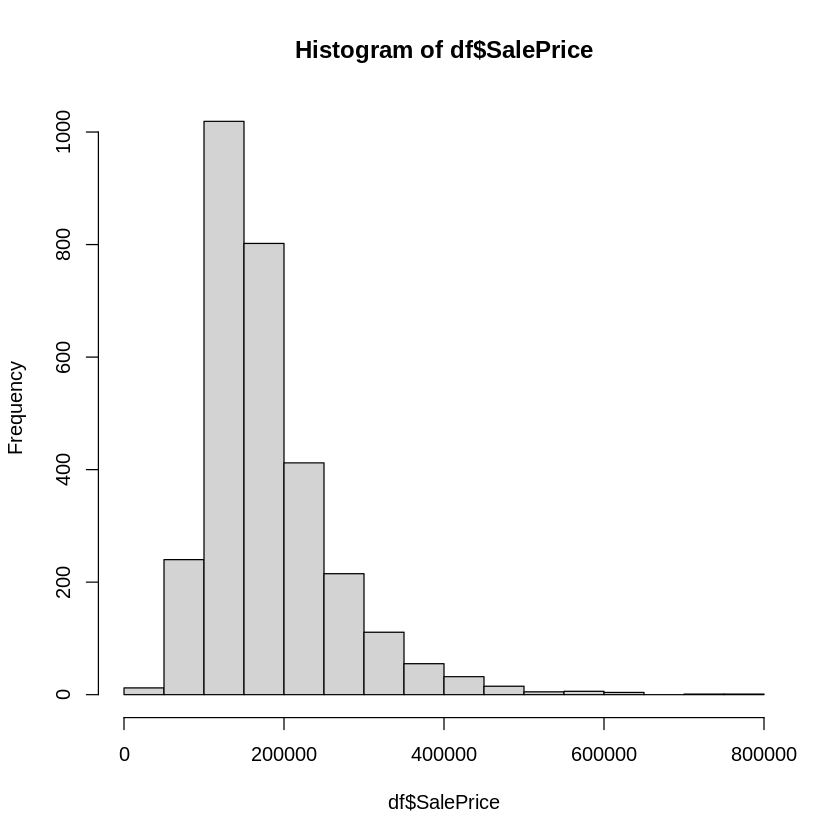

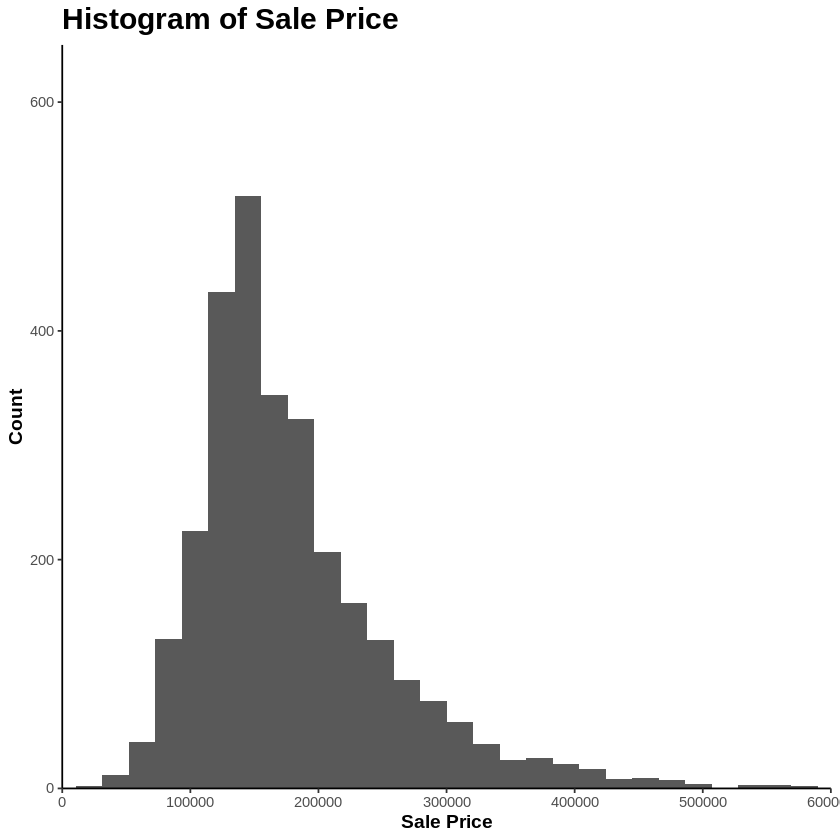

In [ ]:
# Visualize the distribution of Y (e.g. use base-R "hist" or "ggplot" from the "ggplot2"-package)
hist(df$SalePrice)

ggplot(data=df, aes(SalePrice)) + 
  geom_histogram()+ 
  scale_x_continuous(limits = c(0,600000), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0,650), expand = c(0, 0)) +
  labs(title="Histogram of Sale Price")+
  ylab(label="Count") + 
  xlab("Sale Price")+
  theme_classic()+
  theme(axis.title.x = element_text(colour = "black", size=11.5, face="bold"), axis.title.y = element_text(colour = "black", size=11.5, face="bold"))+
  theme(plot.title = element_text(hjust = 0, color="black", size=18, face="bold"))

Warning message:
“Removed 20 rows containing missing values (geom_point).”


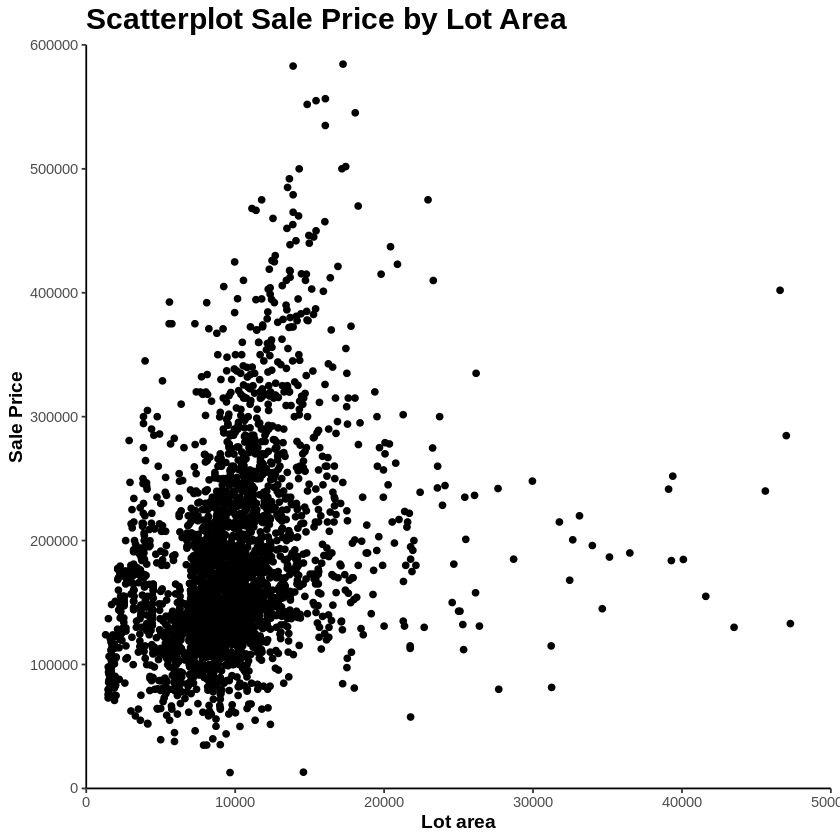

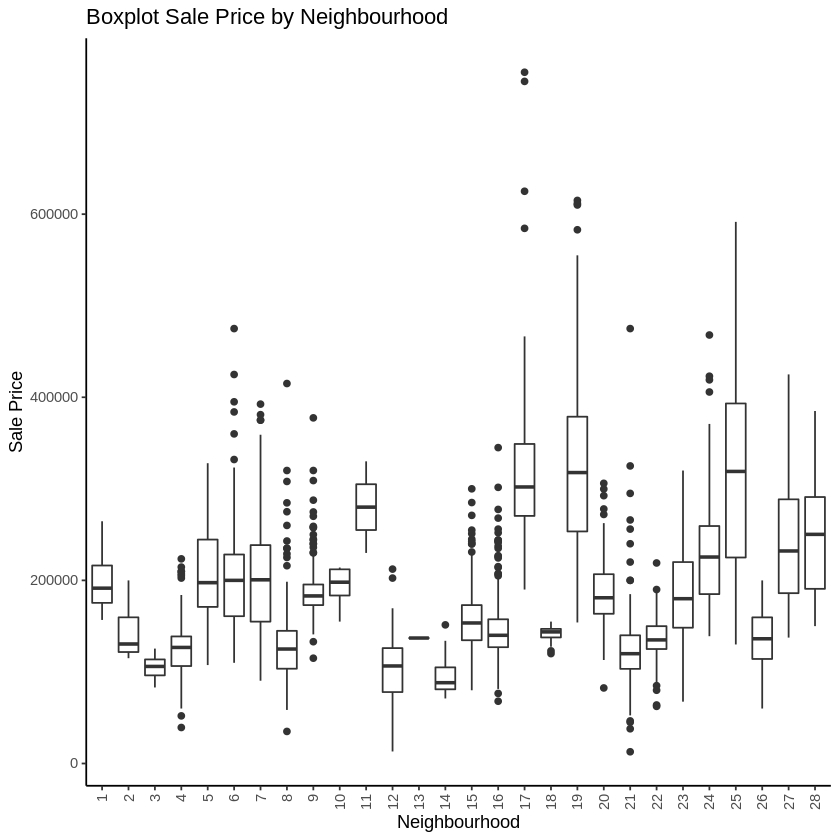

In [ ]:
# Visualize the distribution of Y by looking at various subgroups (e.g. create boxplot or scatterplot using the "ggplot2"-package)

# Scatterplot
ggplot(df, aes(x=Lot.Area, y=SalePrice)) + 
  geom_point() +
  scale_x_continuous(limits = c(0,50000), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0,600000), expand = c(0, 0)) +
  labs(title="Scatterplot Sale Price by Lot Area")+
  ylab(label="Sale Price") + 
  xlab("Lot area")+
  theme_classic()+
  theme(axis.title.x = element_text(colour = "black", size=11.5, face="bold"), axis.title.y = element_text(colour = "black", size=11.5, face="bold"))+
  theme(plot.title = element_text(hjust = 0, color="black", size=18, face="bold"))

# Boxplot
ggplot(data=df, aes(x=Neighborhood, y=SalePrice)) + 
  geom_boxplot()+
  labs(title="Boxplot Sale Price by Neighbourhood")+
  ylab(label="Sale Price") + 
  xlab("Neighbourhood")+
  theme_classic()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

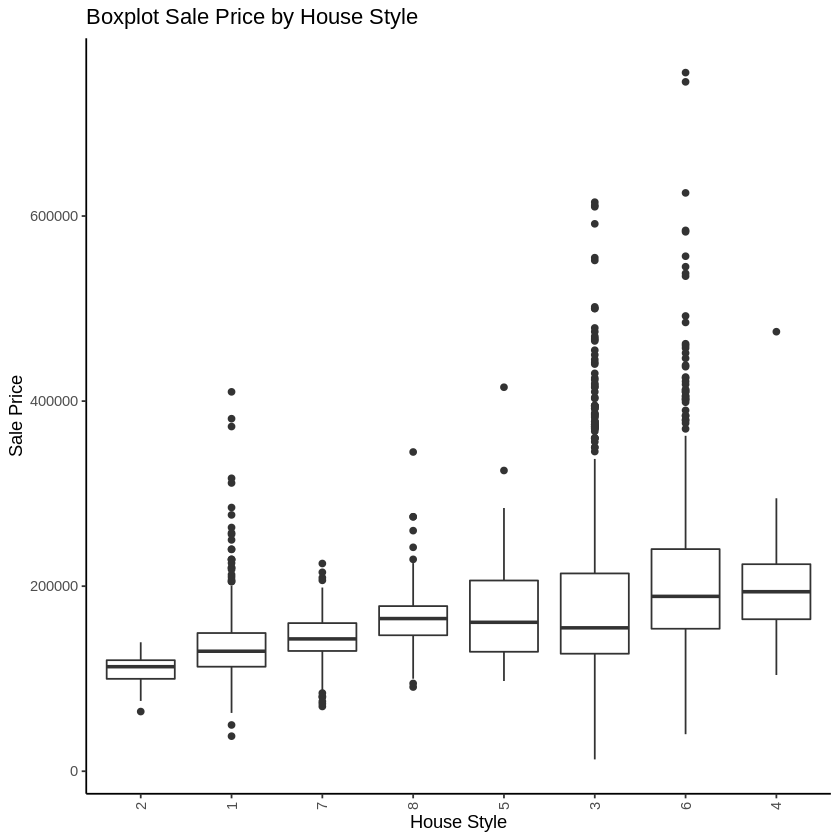

In [ ]:
# Look at differences between housing style
ggplot(data=df, aes(x=reorder(House.Style,SalePrice), y=SalePrice)) + 
  geom_boxplot()+
  labs(title="Boxplot Sale Price by House Style")+
  ylab(label="Sale Price") + 
  xlab("House Style")+
  theme_classic()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

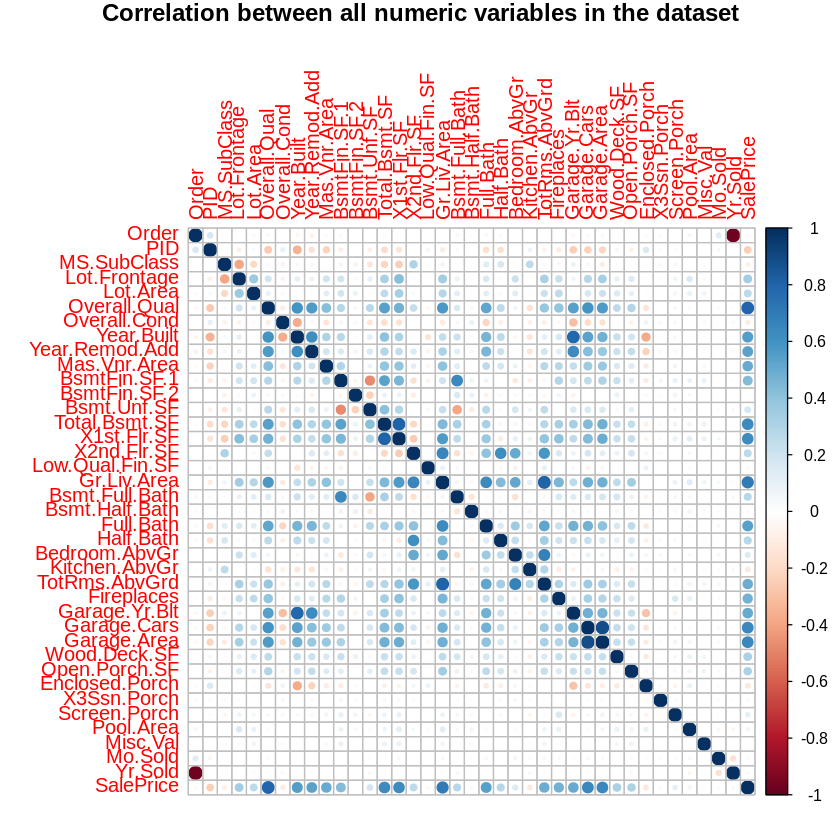

In [ ]:
# Correlation plot 
corr_df <- df %>% 
  keep(is.numeric) %>% 
  cor

corrplot(corr_df, number.font=12, tl.cex = 1.00, title="Correlation between all numeric variables in the dataset", mar=c(0,0,1,0))

## Exercise 4
Now that we have a better feeling of the information in the dataset and we took care of the missing values, we can start by running some (additional) simple machine learning models.
We will use the "caret"-package for this exercise. 
Split the data randomly into a train set (70%) and test set (30%)

In [ ]:
set.seed (1234)
dt = sort(sample(nrow(df), nrow(df)*.7)) ## 70% in train set
train<-df[dt,]
test<-df[-dt,]

Next we need to specify how we want to perform the cross-validation (i.e. the optimization of the model on the train set). To this extend we need to set the method of CV, the number of folds and the numer of times we want to repeat the process.
This can be done using the following command:

In [ ]:
# Cross-validation strategy
ctrl <- trainControl(method = "repeatedcv",
                     number = 5,    # ten folds
                     repeats = 3)   # repeated three times

## Exercise 4.1
Once this has been set, we are ready to run the models on the train set. 
Use the syntax below to estimate a LASSO model and a kNN model on the train set.
Please inspect the outcomes of the model. Which model performs best on the training set? 

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Neighborhood13, Roof.Matl5, Exterior.1st2, Exterior.1st11, Exterior.2nd2, Exterior.2nd5, Exterior.2nd12, Mas.Vnr.Type4, Bsmt.Cond5, Electrical5, Kitchen.Qual4, Functional6, Garage.Qual5, Misc.Feature5”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Roof.Matl5, Exterior.1st5, Electrical5, Kitchen.Qual4, Functional6, Sale.Type9”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition.27, Roof.Matl3, Roof.Matl5, Exterior.1st8, Electrical5, Kitchen.Qual4, Functional6, Functional7, Garage.Cond2”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Utilities2, Roof.Matl4, Roof.Matl5, Exterior.1st12, Bsmt.Qual5, Heating5, Ele

glmnet 

2051 samples
  81 predictor

Pre-processing: centered (287), scaled (287) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 1641, 1639, 1643, 1640, 1641, 1643, ... 
Resampling results across tuning parameters:

  lambda          RMSE      Rsquared   MAE     
     0.001000000  38105.80  0.7829833  17303.75
     0.001149757  38105.80  0.7829833  17303.75
     0.001321941  38105.80  0.7829833  17303.75
     0.001519911  38105.80  0.7829833  17303.75
     0.001747528  38105.80  0.7829833  17303.75
     0.002009233  38105.80  0.7829833  17303.75
     0.002310130  38105.80  0.7829833  17303.75
     0.002656088  38105.80  0.7829833  17303.75
     0.003053856  38105.80  0.7829833  17303.75
     0.003511192  38105.80  0.7829833  17303.75
     0.004037017  38105.80  0.7829833  17303.75
     0.004641589  38105.80  0.7829833  17303.75
     0.005336699  38105.80  0.7829833  17303.75
     0.006135907  38105.80  0.7829833  17303.75
     0.007054802  38105.80  

glmnet variable importance

  only 20 most important variables shown (out of 287)

                Overall
Gr.Liv.Area      100.00
Overall.Qual      52.46
Kitchen.Qual5     42.94
Pool.QC3          39.93
Kitchen.Qual3     39.19
Bsmt.Qual2        31.81
Year.Built        29.56
Neighborhood19    28.19
Neighborhood25    24.91
Overall.Cond      24.33
BsmtFin.SF.1      22.41
Neighborhood17    22.32
Condition.25      22.32
Bsmt.Exposure3    20.61
Sale.Condition6   19.33
MS.SubClass       19.31
Garage.Area       17.32
Total.Bsmt.SF     16.79
Mas.Vnr.Area      16.22
Lot.Area          13.87

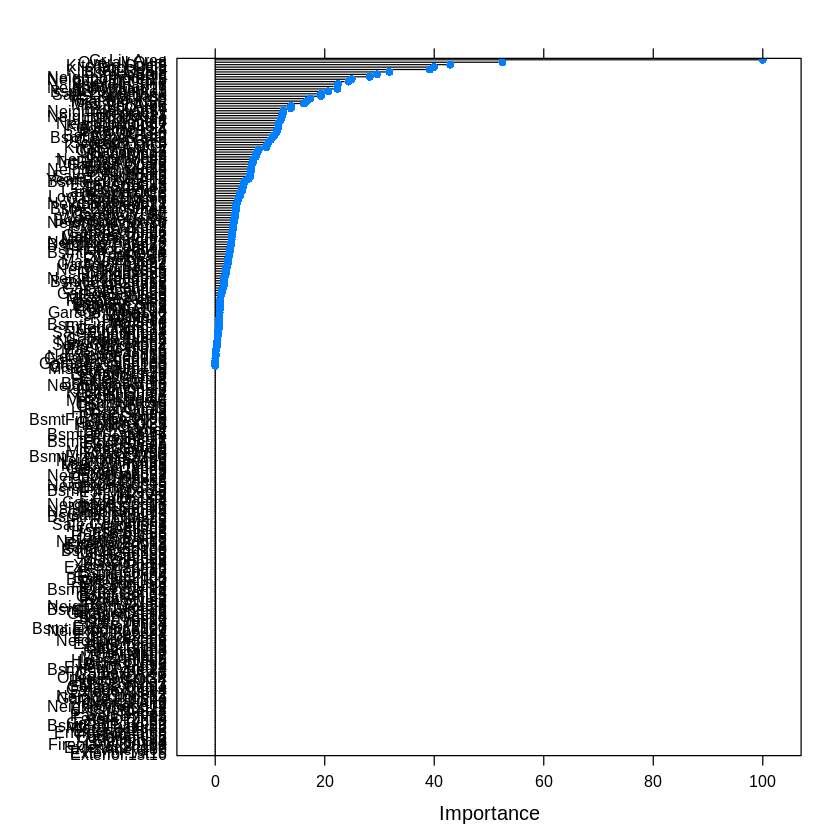

In [ ]:
## Run LASSO
lambda <- 10^seq(-3,3,length=100)

lassoFit <- train(SalePrice ~ ., 
                  data = train, 
                  method = "glmnet", 
                  trControl = ctrl, 
                  preProcess = c("center","scale"),
                  tuneGrid = expand.grid(alpha = 1, lambda = lambda))

lassoFit # to obtain summary of the model
varImp(lassoFit) # to see most important parameters
plot(varImp(lassoFit)) # to plot most important parameters

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: MS.Zoning4, Neighborhood13, Roof.Matl5, Exterior.1st12, Heating.QC4, Electrical5, Kitchen.Qual4, Functional6, Garage.Qual5”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: MS.Zoning4, Neighborhood13, Roof.Matl5, Exterior.1st12, Heating.QC4, Electrical5, Kitchen.Qual4, Functional6, Garage.Qual5”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: MS.Zoning4, Neighborhood13, Roof.Matl5, Exterior.1st12, Heating.QC4, Electrical5, Kitchen.Qual4, Functional6, Garage.Qual5”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition.25, Roof.Matl5, Exterior.1st8, Exterior.1st11, Exterior.2nd12, Bsmt.Cond5, Electrical5, Kitchen.Qu

k-Nearest Neighbors 

2051 samples
  81 predictor

Pre-processing: centered (287), scaled (287) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 1641, 1639, 1642, 1641, 1641, 1642, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  5  39410.87  0.7561386  25246.31
  7  38560.39  0.7712460  24720.58
  9  38241.39  0.7779310  24607.36

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.

loess r-squared variable importance

  only 20 most important variables shown (out of 81)

               Overall
Overall.Qual    100.00
Gr.Liv.Area      77.50
Total.Bsmt.SF    72.58
Garage.Area      69.49
Exter.Qual       66.08
X1st.Flr.SF      65.42
Garage.Cars      64.96
Kitchen.Qual     56.42
Year.Built       48.30
BsmtFin.SF.1     46.56
Full.Bath        44.97
Year.Remod.Add   44.44
Garage.Yr.Blt    39.28
Mas.Vnr.Area     36.12
Fireplaces       35.64
TotRms.AbvGrd    35.13
Bsmt.Qual        32.73
X2nd.Flr.SF      31.73
Heating.QC       28.15
PID              27.35

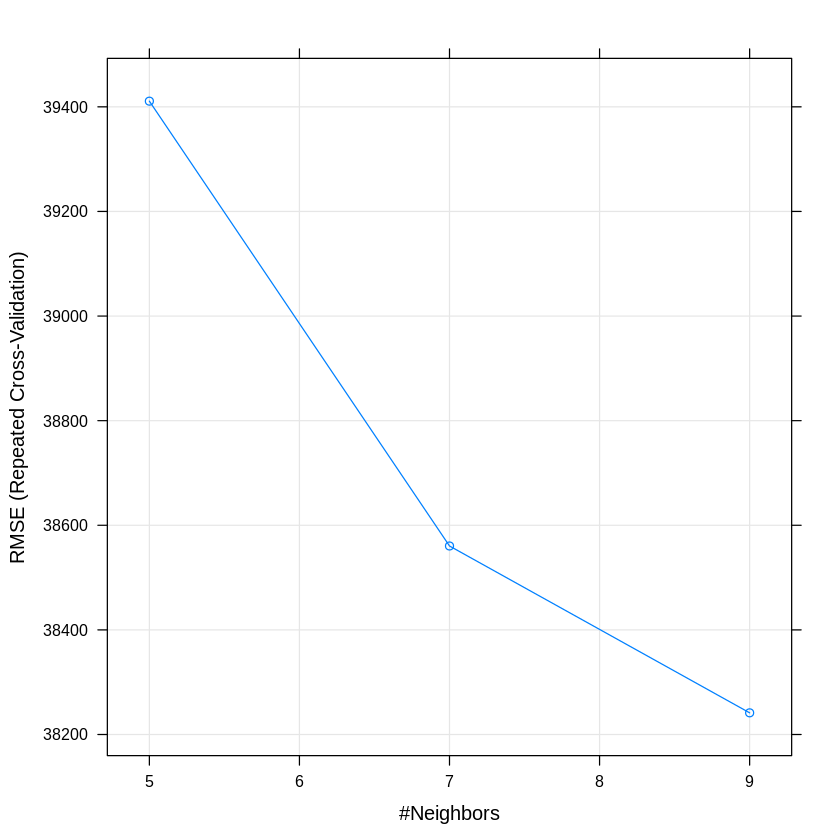

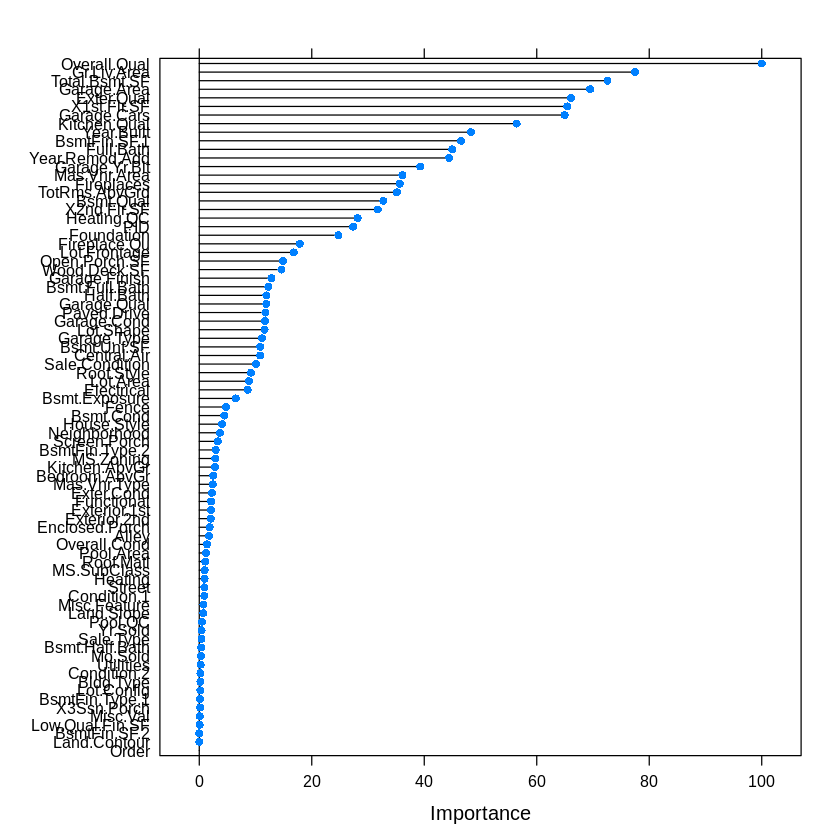

In [ ]:
## Run kNN
knnFit <- train(SalePrice ~ ., 
                data = train, 
                method = "knn", 
                trControl = ctrl, 
                preProcess = c("center","scale"))

knnFit  # to obtain summary of the model
plot(knnFit)
varImp(knnFit) # to see most important parameters
plot(varImp(knnFit)) # to plot most important parameters

## Exercise 4.2
Now all we have to do is to check the performance of our best performing model on the test dataset. 
Please use the  code below to check this performance.
Which model is best?

In [ ]:
## Check performance on test set

# For LASSO
print("LASSO performance")
pred_lassoFit <- predict(lassoFit, newdata = test)
round(rmse(actual = test$SalePrice,
           predicted = pred_lassoFit), 3)

# For KNN
print("KNN performance")
pred_knn <- predict(knnFit, newdata = test)
round(rmse(actual = test$SalePrice,
           predicted = pred_knn), 3)


[1] "LASSO performance"


[1] 30596.71

[1] "KNN performance"


[1] 38780.09

LASSO is performing much better than KNN, which was to be expected as KNN is much more likely to suffer from the curse of high-dimensionality than LASSO in this dataset with a fairly large number of variables.